In [7]:
import random
import numpy as np
from sklearn import datasets

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
target = iris.target

# One-hot encoding
num = np.unique(target)
num = num.shape[0]
y = np.eye(num)[target]

# SLP function with SGD
def SLP_SGD(tr_X, tr_y, alpha, rep):
    n = tr_X.shape[1]
    w = (np.random.rand(n, tr_y.shape[1]) - 0.5)  # Initialize weights with random values
    for i in range(rep):
        for k in range(tr_X.shape[0]):
            x = tr_X[k, :]
            v = np.dot(x, w)
            y = sigmoid(v)
            e = tr_y[k, :] - y
            w = w + alpha * np.matmul(x.reshape(-1, 1), (y * (1 - y) * e).reshape(1, -1))
        print("error", i, np.mean(e))
    return w



W = SLP_SGD(X, y, alpha=0.01, rep=600)


pred = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    v = np.dot(X[i, :], W)
    y = sigmoid(v)
    pred[i] = np.argmax(y)
    print("target, predict", target[i], pred[i])

print("accuracy:", np.mean(pred == target))


error 0 0.015616975605222813
error 1 -0.024438350804458553
error 2 -0.024773630661847585
error 3 -0.02376229727742433
error 4 -0.02256902349351103
error 5 -0.021334460285222196
error 6 -0.02011306975244927
error 7 -0.018932172796697067
error 8 -0.017805734142981738
error 9 -0.01674031860327585
error 10 -0.015738136329152014
error 11 -0.014798753078848629
error 12 -0.013920128496567949
error 13 -0.013099282147891847
error 14 -0.012332732913537295
error 15 -0.01161679018704829
error 16 -0.010947744206675833
error 17 -0.010321986718811635
error 18 -0.009736083593273307
error 19 -0.00918681466922828
error 20 -0.008671191647371753
error 21 -0.008186461630664508
error 22 -0.007730101598350377
error 23 -0.007299807438441099
error 24 -0.0068934799876711195
error 25 -0.006509209703267386
error 26 -0.006145261018900709
error 27 -0.005800057044727053
error 28 -0.005472165005239726
error 29 -0.005160282630530098
error 30 -0.004863225599274175
error 31 -0.004579916056284957
error 32 -0.004309372180

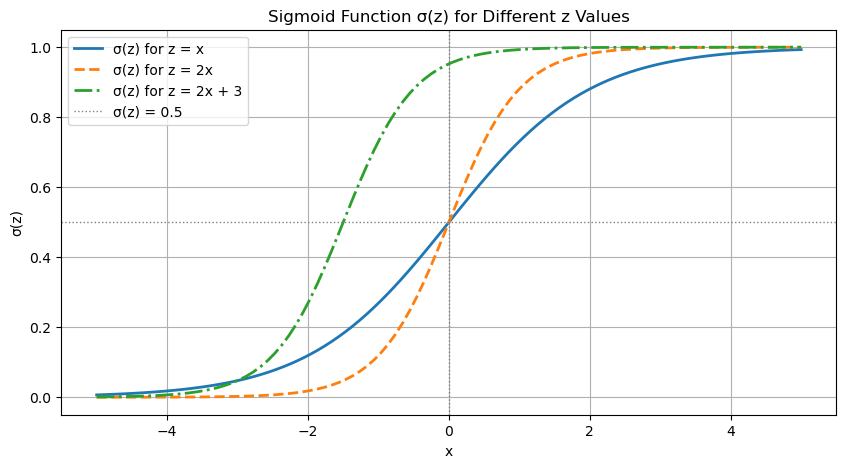

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate x values
x = np.linspace(-5, 5, 100)

# Calculate sigmoid values for the three different z values
z1 = x
z2 = 2 * x
z3 = 2 * x + 3

sigmoid_z1 = sigmoid(z1)
sigmoid_z2 = sigmoid(z2)
sigmoid_z3 = sigmoid(z3)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_z1, label='σ(z) for z = x', linestyle='-', linewidth=2)
plt.plot(x, sigmoid_z2, label='σ(z) for z = 2x', linestyle='--', linewidth=2)
plt.plot(x, sigmoid_z3, label='σ(z) for z = 2x + 3', linestyle='-.', linewidth=2)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=1, label='σ(z) = 0.5')
plt.axvline(0, color='gray', linestyle=':', linewidth=1)

plt.xlabel('x')
plt.ylabel('σ(z)')
plt.title('Sigmoid Function σ(z) for Different z Values')
plt.legend()
plt.grid(True)
plt.show()
